### Unemployment Analysis with Python

Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analysing the unemployment rate
can be a good data science project.

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Datasets/Unemployment in India.csv')

### Data Wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df.shape

(768, 7)

In [6]:
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
#since it is only about 3 percent of the data, we will drop all the null values
df=df.dropna()

In [8]:
df.shape

(740, 7)

In [9]:
#we use string command and strip the columns of empty spaces
df.columns=df.columns.str.strip()

In [10]:
mean_eur_region=df.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
mean_eur_region

Region
Andhra Pradesh       7.477143
Assam                6.428077
Bihar               18.918214
Chandigarh          15.991667
Chhattisgarh         9.240357
Delhi               16.495357
Goa                  9.274167
Gujarat              6.663929
Haryana             26.283214
Himachal Pradesh    18.540357
Jammu & Kashmir     16.188571
Jharkhand           20.585000
Karnataka            6.676071
Kerala              10.123929
Madhya Pradesh       7.406429
Maharashtra          7.557500
Meghalaya            4.798889
Odisha               5.657857
Puducherry          10.215000
Punjab              12.031071
Rajasthan           14.058214
Sikkim               7.249412
Tamil Nadu           9.284286
Telangana            7.737857
Tripura             28.350357
Uttar Pradesh       12.551429
Uttarakhand          6.582963
West Bengal          8.124643
Name: Estimated Unemployment Rate (%), dtype: float64

In [11]:
mean_eur_region.sort_values(ascending=False)

Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Delhi               16.495357
Jammu & Kashmir     16.188571
Chandigarh          15.991667
Rajasthan           14.058214
Uttar Pradesh       12.551429
Punjab              12.031071
Puducherry          10.215000
Kerala              10.123929
Tamil Nadu           9.284286
Goa                  9.274167
Chhattisgarh         9.240357
West Bengal          8.124643
Telangana            7.737857
Maharashtra          7.557500
Andhra Pradesh       7.477143
Madhya Pradesh       7.406429
Sikkim               7.249412
Karnataka            6.676071
Gujarat              6.663929
Uttarakhand          6.582963
Assam                6.428077
Odisha               5.657857
Meghalaya            4.798889
Name: Estimated Unemployment Rate (%), dtype: float64

## Exploratory Data Analysis

### Bar Plot of mean Estimated Unemployment Rate (EUR)
    *We can see that the northern states had more unemployment rate
    *The gangatic plains, especially had a very bad effect
    *Tripura is an outlier in the sense that it is a NE state, which in general were less impacted
    *The Southern states were relatively less impacted
    *The states that have comparatively been least influenced were the NE states with the exception of Tripura

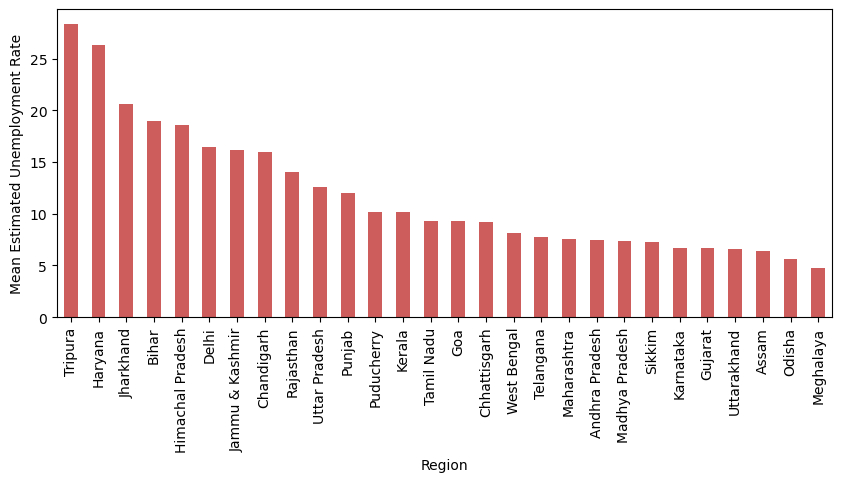

In [12]:
plt.figure(figsize=(10,4))
mean_eur_region.sort_values(ascending=False).plot(kind='bar', color='indianred')
plt.ylabel('Mean Estimated Unemployment Rate')
plt.show()

In [13]:
mean_eur_area=df.groupby('Area')['Estimated Unemployment Rate (%)'].mean()
mean_eur_area

Area
Rural    10.324791
Urban    13.166614
Name: Estimated Unemployment Rate (%), dtype: float64

### Mean EUR based on Area
    *Urban areas have had the highest increase in unemployment rate as expected. Most blue and white collar jobs are located in urban areas and hence, they will be more affected
    *Rural economy has primarily been based agriculture and hence covid has had a lesser effect

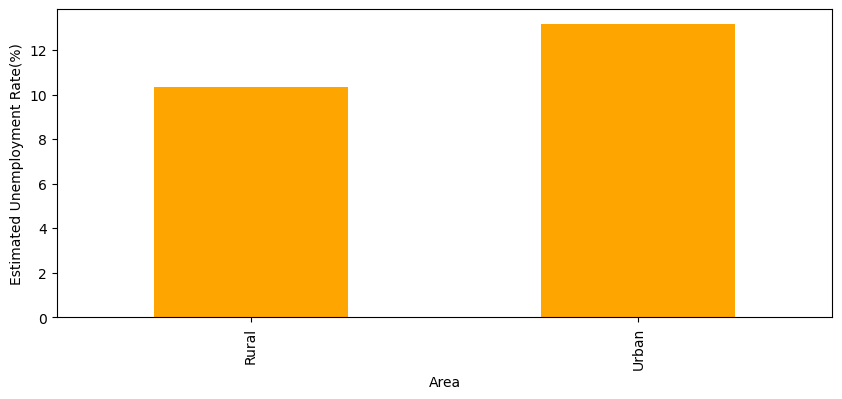

In [14]:
plt.figure(figsize=(10,4))
mean_eur_area.plot(kind='bar', color='orange')
plt.ylabel('Estimated Unemployment Rate(%)')
plt.show()

In [15]:
df['Frequency'].unique()

array([' Monthly', 'Monthly'], dtype=object)

In [16]:
#since there is empty space in some of the 'Monthly' variables in Frequency column. we strip it
df['Frequency']=df['Frequency'].str.strip()

In [17]:
df['Frequency'].unique()

array(['Monthly'], dtype=object)

In [18]:
df.drop('Frequency', axis=1, inplace=True)

### Analysis of Estimated Labor Participation Rate (ELPR) by Region

In [19]:
mean_elp_region=df.groupby('Region')['Estimated Labour Participation Rate (%)'].mean()

In [20]:
mean_elp_region.sort_values(ascending=False)

Region
Tripura             61.823929
Meghalaya           57.080741
Telangana           53.002500
Gujarat             46.101071
Sikkim              46.070000
West Bengal         45.417500
Assam               44.868462
Himachal Pradesh    44.222143
Chhattisgarh        42.810714
Haryana             42.737143
Maharashtra         42.303214
Jharkhand           41.670714
Karnataka           41.345357
Punjab              41.138214
Jammu & Kashmir     41.030952
Tamil Nadu          40.872143
Rajasthan           39.973214
Uttar Pradesh       39.432500
Andhra Pradesh      39.375714
Chandigarh          39.336667
Goa                 39.249583
Puducherry          38.992692
Delhi               38.929643
Odisha              38.926429
Madhya Pradesh      38.821429
Bihar               38.153929
Kerala              34.867857
Uttarakhand         33.775556
Name: Estimated Labour Participation Rate (%), dtype: float64

### Bar chart of Mean Estimated Labour Participation Rate over Region (ELPR)
    *Tripura, although high in mean Estimated Unemployment Rate is also high in ELPR.
    *The North Eastern (NE) states stands out with high ELPR
    *The Northern and Southern states are distributed evenly

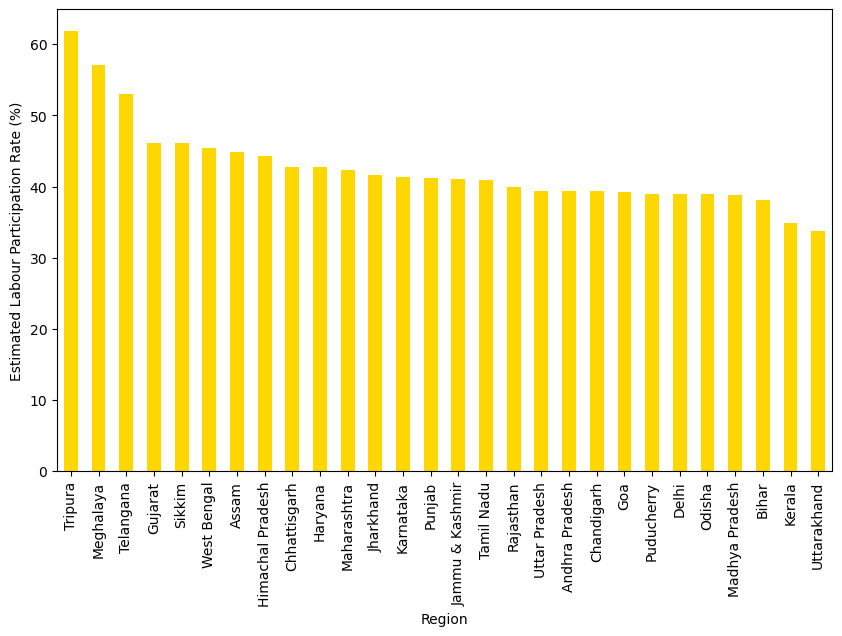

In [21]:
plt.figure(figsize=(10,6))
mean_elp_region.sort_values(ascending=False).plot(kind='bar', color='gold')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.show()

### Monthly Analysis

In [22]:
#convert Date column to date_time format from pandas
df['Date']=pd.to_datetime(df['Date'])

In [23]:
#create a new column 'Year/Month' to use for analysis over time(month.)
df['Year/Month']=df['Date'].dt.strftime('%y-%m')

In [24]:
#find mean EUR grouped by 'Year/Month'
monthly_eur_mean=df.groupby('Year/Month')['Estimated Unemployment Rate (%)'].mean()

In [25]:
monthly_eur_mean

Year/Month
19-05     8.874259
19-06     9.303333
19-07     9.033889
19-08     9.637925
19-09     9.051731
19-10     9.900909
19-11     9.868364
19-12     9.497358
20-01     9.950755
20-02     9.964717
20-03    10.700577
20-04    23.641569
20-05    24.875294
20-06    11.903600
Name: Estimated Unemployment Rate (%), dtype: float64

### Unemployment over time
    *Unemployment has shown a pattern of general rise since May 2019
    *However, it spikes and doubles in April and May of 2020. This shows a external factor
    *April and May were the months of lockdown and can be interpreted as the cause
    *June shows marked decrease in mean EUR, almost going down to expected levels.

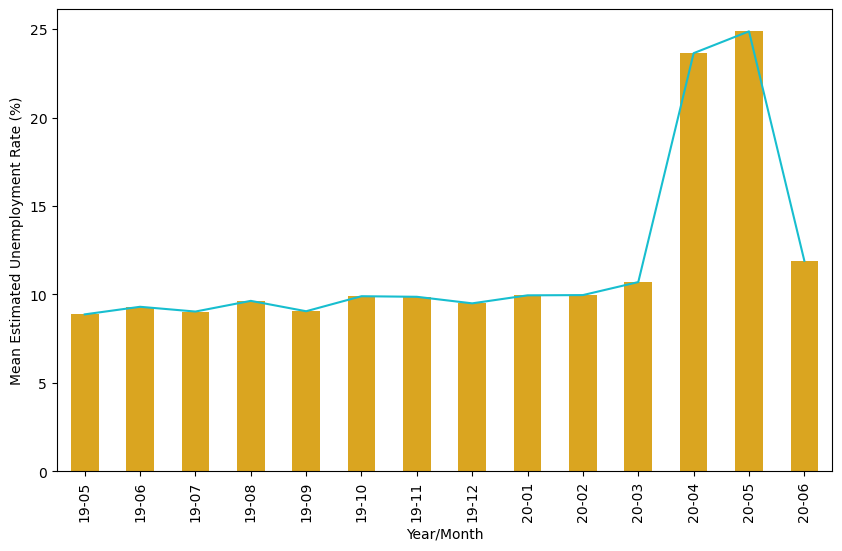

In [26]:
plt.figure(figsize=(10,6))
monthly_eur_mean.plot(kind='line', color='tab:cyan')
monthly_eur_mean.plot(kind='bar', color='goldenrod')
plt.ylabel('Mean Estimated Unemployment Rate (%)')
plt.show()

In [27]:
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year/Month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,19-05
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,19-06
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,19-07
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,19-08
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,19-09


In [28]:
monthly_elpr_mean=df.groupby('Year/Month')['Estimated Labour Participation Rate (%)'].mean()

In [29]:
monthly_elpr_mean

Year/Month
19-05    43.902963
19-06    43.750556
19-07    43.706667
19-08    43.646792
19-09    44.301346
19-10    44.001273
19-11    44.110545
19-12    43.667358
20-01    44.051321
20-02    43.723019
20-03    43.084038
20-04    35.141176
20-05    38.496863
20-06    40.548400
Name: Estimated Labour Participation Rate (%), dtype: float64

### Mean Estimated Labor Participation Rate (ELPR) over time
    *ELPR drops during the time of lock down months and significantly rises in June when everything opens again

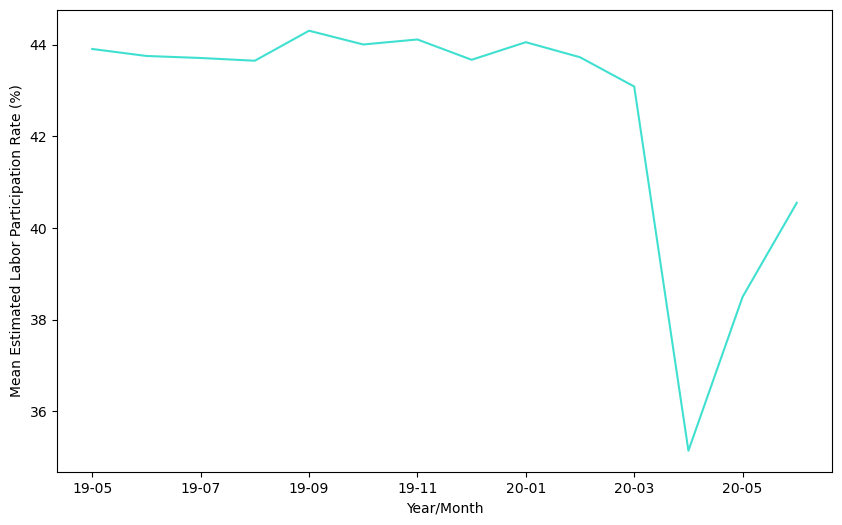

In [30]:
plt.figure(figsize=(10,6))
monthly_elpr_mean.plot(kind='line', color='turquoise')
# monthly_elpr_mean.plot(kind='bar', color='peru')
plt.ylabel('Mean Estimated Labor Participation Rate (%)')
plt.show()

In [31]:
#lets create a data frame

df_eur_elpr = pd.DataFrame({
    'Year/Month': monthly_elpr_mean.index,
    'Estimated Unemployment Rate (%)': monthly_eur_mean.values,
    'Estimated Labour Participation Rate (%)': monthly_elpr_mean.values
})

In [32]:
df_eur_elpr

,Year/Month,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%)
0,19-05,8.874259,43.902963
1,19-06,9.303333,43.750556
2,19-07,9.033889,43.706667
3,19-08,9.637925,43.646792
4,19-09,9.051731,44.301346
5,19-10,9.900909,44.001273
6,19-11,9.868364,44.110545
7,19-12,9.497358,43.667358
8,20-01,9.950755,44.051321
9,20-02,9.964717,43.723019


### Bivariate Analysis of Mean EUR and Mean ELPR
    *Plot shows a negative correlation between EUR and EPLA as expected
    *April and May shows the higest dip in ELPR and consequently rise in EUR

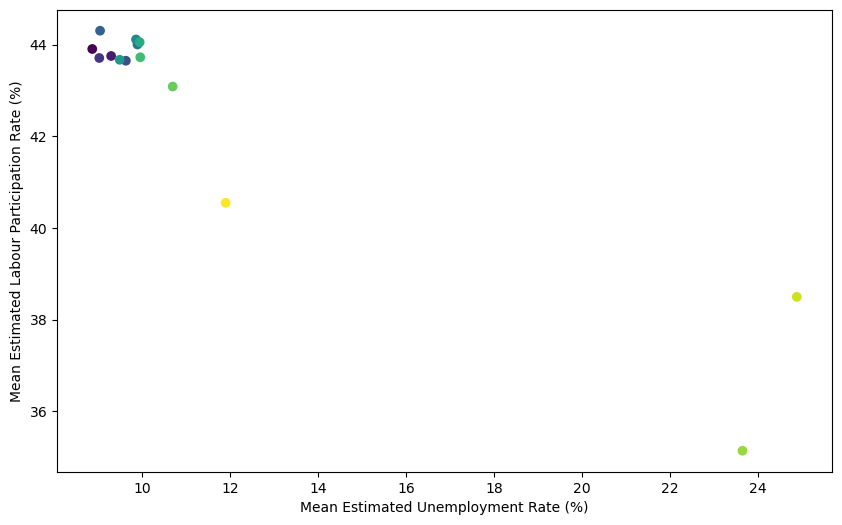

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(
    y=df_eur_elpr['Estimated Labour Participation Rate (%)'],
    x=df_eur_elpr['Estimated Unemployment Rate (%)'],
    c=df_eur_elpr.index
)
plt.xlabel('Mean Estimated Unemployment Rate (%)')
plt.ylabel('Mean Estimated Labour Participation Rate (%)')
plt.show()